In [106]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
from datetime import datetime, timedelta
import pytz
from pytz import timezone
from pandas.io import sql
import pymysql.cursors

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

###### Please find below questions related to "demographics" part of the study

- Users characteristics ?
- What does a typical user look like ?
- What goals do they have ?
- How do these goals vary by demographics or need ? 

In [158]:
#Importing all datasets (all of operations are detailled in notebooks from directory called "exploring")

#users with complete timezone
users_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/users_timezone.csv',error_bad_lines=False)

#food
food_df = pd.read_csv('/Users/kevenlemoing/Sites/Lifesum_assignement/data/food.csv',error_bad_lines=False)

#exercise
ex_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/exercise.csv',error_bad_lines=False)

#weight
weight_df = pd.read_csv('/Users/kevenlemoing/Sites/lifesum_assignement/data/weight.csv',error_bad_lines=False)

In [159]:
users_df.head()

,Unnamed: 0,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg
0,0,24822001,2017-09-14,NaN,18,BR,pt,f,2017-09-14 00:00:00 FNT-0200,178.7
1,1,23529201,2017-07-12,50.0,23,NL,nl,m,2017-07-12 00:00:00 CEST+0200,50.0
2,2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2
3,3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1
4,4,24776001,2017-09-12,52.0,23,CA,en,f,2017-09-12 00:00:00 EDT-0400,70.0


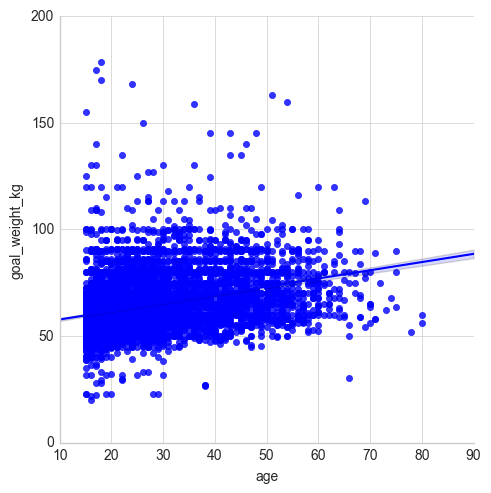

In [31]:
# Using seabron to create a linear fit
sns.lmplot('age','goal_weight_kg',data = users_df)

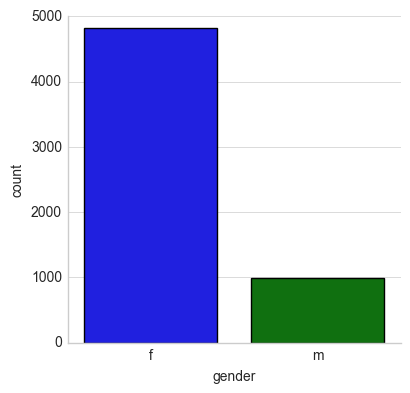

In [39]:
#Searching of users characteristics
sns.factorplot('gender', kind="count", data=users_df)

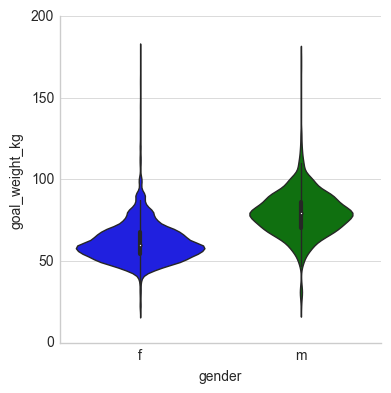

In [54]:
# Factorplot the affiliation by Population
#sns.factorplot('goal_weight_kg', kind="count", data=users_df,hue='gender') point, bar, count, c, violin, strip}
sns.factorplot(x="gender", y="goal_weight_kg", kind="violin", data=users_df)

In [ ]:
#Age Goal Weight

In [75]:
#Define a BIM referential (from https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi-m.htm)

#Two lists to implement my referential
categories = ['underweight','normal_weight', 'overweight','obesity']
bim_range = ['<18.5', '[18.5;25[', '[25–30]', '>30']

#Dataframe creation
d = {'categories':categories,'bim_range':bim_range}
bim_df = pd.DataFrame(d)

bim_df.head()

,bim_range,categories
0,<18.5,underweight
1,18.5–24.9,normal_weight
2,25–29.9,overweight
3,>30,obesity


In [160]:
#Categorize users target bim (step 1)

#Calculate the numeric value
bim_num = []

for i in range (len(users_df['user_id'])):
    bim_num.append(users_df['goal_weight_kg'][i]/((users_df['height_cm'][i]*0.01)**2))
    

In [162]:
#Categorize users target bim (step 2)

#Identify the label
bim_cat = []

for i in range (len(bim_num)):
    
    if bim_num[i] < 18.5:
        bim_cat.append(bim_df['categories'][0])
        
    elif 18.5 <= bim_num[i] < 25:
        bim_cat.append(bim_df['categories'][1])
    
    elif 25 <= bim_num[i] <= 30:
        bim_cat.append(bim_df['categories'][2])
        
    elif bim_num[i] > 30:
        bim_cat.append(bim_df['categories'][3])
    
    else:
        bim_cat.append(np.nan)

In [163]:
#Enrich the dataframe
users_df['bim_num'] = bim_num
users_df['bim_cat'] = bim_cat

In [164]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5810 entries, 0 to 5809
Data columns (total 12 columns):
Unnamed: 0        5810 non-null int64
user_id           5810 non-null int64
start_date        5810 non-null object
height_cm         5809 non-null float64
age               5810 non-null int64
country           5808 non-null object
language          5810 non-null object
gender            5810 non-null object
timezone          5809 non-null object
goal_weight_kg    5810 non-null float64
bim_num           5809 non-null float64
bim_cat           5809 non-null object
dtypes: float64(3), int64(3), object(6)
memory usage: 544.8+ KB


In [165]:
users_df.head()

,Unnamed: 0,user_id,start_date,height_cm,age,country,language,gender,timezone,goal_weight_kg,bim_num,bim_cat
0,0,24822001,2017-09-14,NaN,18,BR,pt,f,2017-09-14 00:00:00 FNT-0200,178.7,NaN,NaN
1,1,23529201,2017-07-12,50.0,23,NL,nl,m,2017-07-12 00:00:00 CEST+0200,50.0,200.000000,obesity
2,2,24352001,2017-08-21,50.0,20,US,en,f,2017-08-21 00:00:00 EDT-0400,57.2,228.800000,obesity
3,3,23379001,2017-07-05,52.0,26,GB,en,f,2017-07-05 00:00:00 IST+0530,33.1,122.411243,obesity
4,4,24776001,2017-09-12,52.0,23,CA,en,f,2017-09-12 00:00:00 EDT-0400,70.0,258.875740,obesity
